In [19]:
import pandas as pd
import re
import numpy as np
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('final_dataset.csv')

In [21]:
df.head()

,Temperature,Rainfall,Humidity,Moisture,Potassium,Phosphorus,Crop
0,23,221,79,397,244,266,Rice
1,16,86,85,625,244,46,Tomato
2,23,68,51,421,243,229,Wheat
3,15,47,62,422,298,430,Barley
4,26,91,32,367,294,20,chile


In [4]:
le = preprocessing.LabelEncoder()

In [5]:
df['Crop'] = le.fit_transform(df['Crop'])

In [22]:
y=df.Crop
X=df.drop('Crop',axis=1)

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [24]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [25]:
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1).fit(X_trainscaled, y_train)

In [26]:
y_pred=clf.predict(X_testscaled)

In [11]:
from sklearn.metrics import r2_score

In [12]:
print(r2_score(y_pred,y_test))

0.9962905853339497


In [13]:
user_input=([[10,100,32,200,100,50]])

In [14]:
prediction=reg.predict(user_input)

In [15]:
prediction

array([15.47309266])

In [27]:
print(clf.score(X_testscaled, y_test))

0.9987878787878788


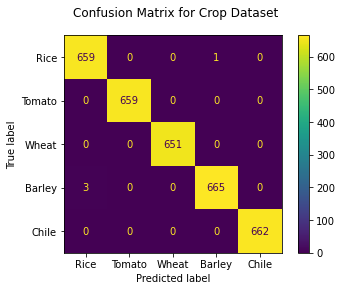

In [30]:
fig=plot_confusion_matrix(clf, X_testscaled, y_test,display_labels=["Rice","Tomato","Wheat","Barley","Chile"])
fig.figure_.suptitle("Confusion Matrix for Crop Dataset")
plt.show()